# Lung Cancer Prediction - Decision Tree Model

In [3]:
import joblib
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load preprocessed data
X_train, X_test, y_train, y_test, scaler = joblib.load('data_preprocessed.pkl')

In [7]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [9]:
# Make predictions
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

In [11]:
# Evaluation Metrics
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



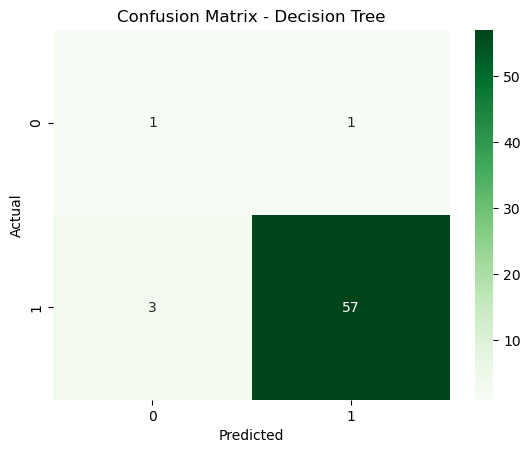

In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

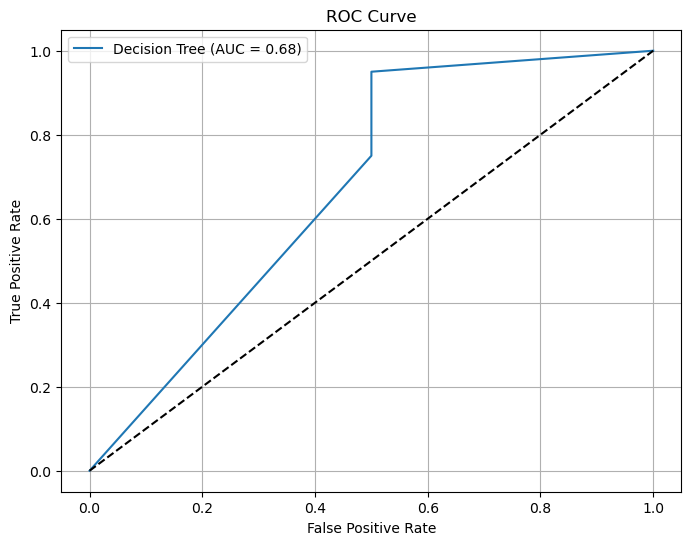

In [15]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

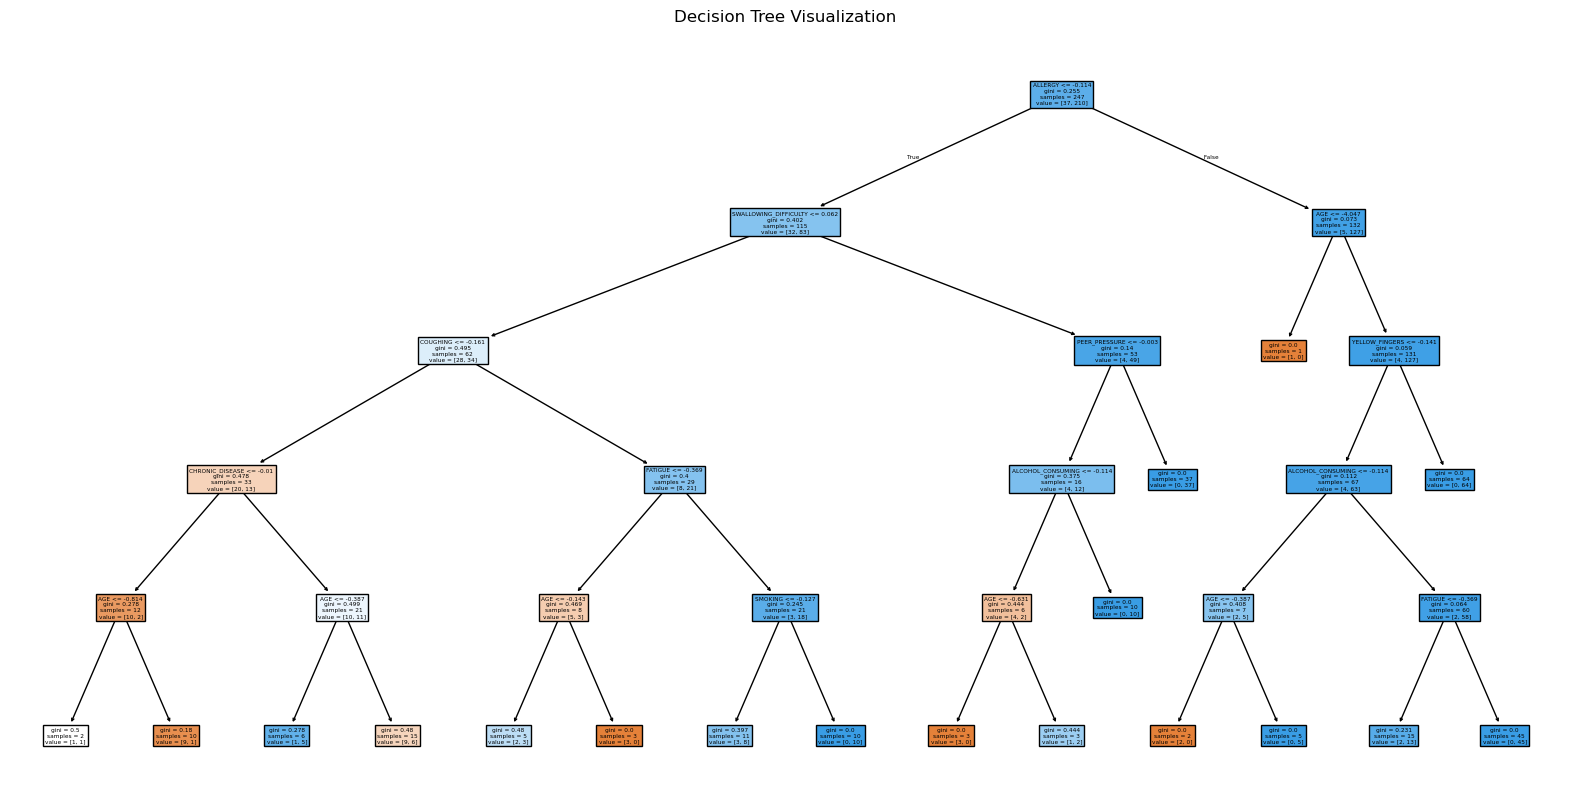

In [17]:
# Visualize Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                                                'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING',
                                                'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'])
plt.title('Decision Tree Visualization')
plt.show()

In [19]:
# Save model
joblib.dump(dt_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [21]:
print("\n✅ Decision Tree model trained, visualized, and saved!")


✅ Decision Tree model trained, visualized, and saved!
